In [4]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('./summary.csv')
len(data)

255502

In [9]:
data.head()

,id,mean,std
0,953417,6.112903,1.123141
1,953777,6.593750,1.491840
2,953756,5.796875,1.295180
3,954195,5.040984,1.176251
4,953903,5.943548,1.321671


# Choosing groups' score ranges

In [31]:
def statistic(named_data: dict[str, pd.DataFrame], column: str, *, start = 2, stop = 10, step=0.5):
    dd = {'score': [''], **{m: [0] for m in named_data}}
    score_range = np.linspace(start, stop, int((stop - start) / step) + 1)
    for i in range(1, len(score_range)):
        dd['score'].append(f'{score_range[i-1]:.2f}-{score_range[i]:.2f}')
        for col in dd:
            if col == 'score': continue
            dd[col].append(len(named_data[col][named_data[col][column] <= score_range[i]]) - sum(dd[col]))
    return pd.DataFrame(dd).iloc[1:]

In [37]:
score_statistic = statistic({'data': data}, column='mean', start=1, stop=9, step=0.5)
score_statistic

,score,data
1,1.00-1.50,0
2,1.50-2.00,6
3,2.00-2.50,104
4,2.50-3.00,433
5,3.00-3.50,1596
6,3.50-4.00,5942
7,4.00-4.50,19625
8,4.50-5.00,46830
9,5.00-5.50,69562
10,5.50-6.00,61645


In [34]:
def statistic_detail(data: pd.DataFrame, split_indexes: list = [7, 11]):
    split_indexes.insert(0, 0)
    split_indexes.append(len(data))
    for col in data.columns[1:]:
        print(f'============ Column `{col}` ============')
        for p, q in zip(split_indexes, split_indexes[1:]):
            print(f"Range {data['score'].iloc[p][:4]} -> {(data['score'].iloc[q-1][-4:])}: {sum(data[col][p:q])}")

In [38]:
statistic_detail(score_statistic, split_indexes=[7,11])

============ Column `data` ============
Range 1.00 -> 4.50: 27706
Range 4.50 -> 6.50: 212187
Range 6.50 -> 9.00: 15609


# Grouping

In [61]:
split_scores = [4.5, 6.5]

In [45]:
def grouping(data: pd.DataFrame, splits: list = [4.5, 6.5], column: str = 'mean'):
    ret = []
    ret.append(data[data[column] <= splits[0]])
    data = data.drop(ret[-1].index)
    for q in splits[1:]:
        ret.append(data[data[column] <= q])
        data = data.drop(ret[-1].index)
    ret.append(data[data[column] > splits[-1]])
    return ret


In [62]:
group_sum = grouping(data, split_scores)

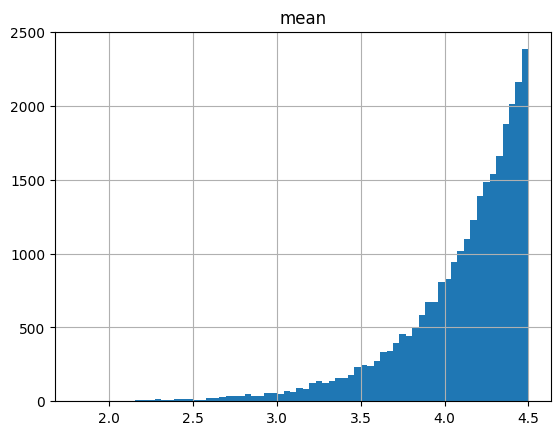

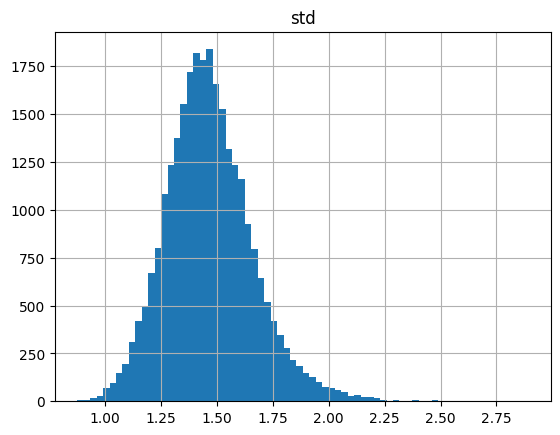

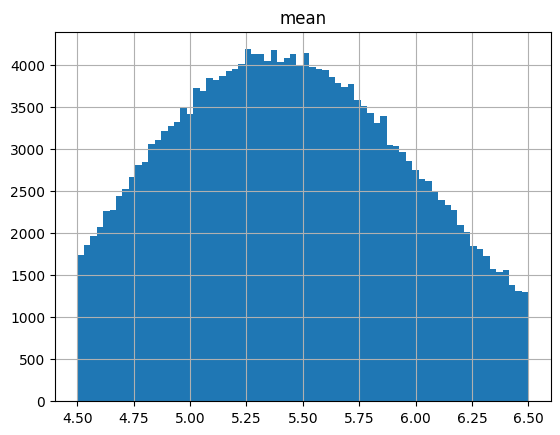

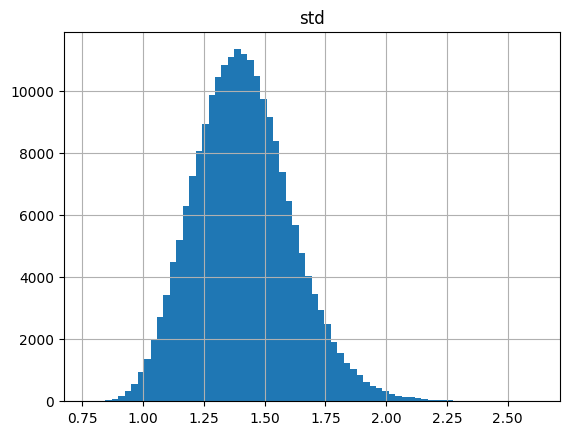

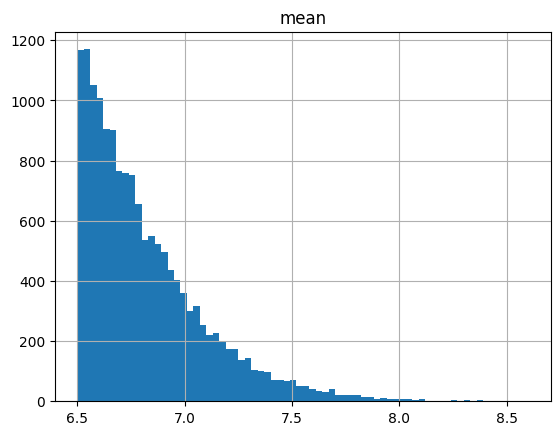

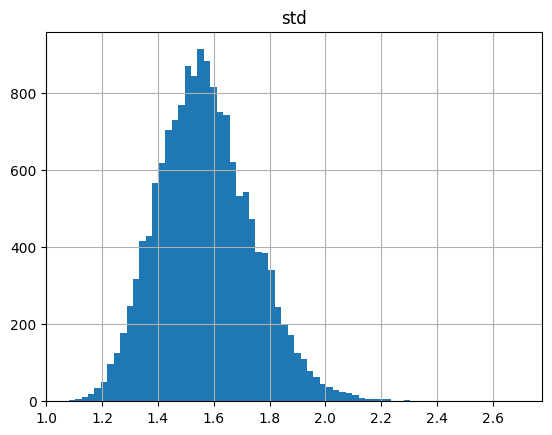

In [63]:
for gr in group_sum:
    gr.hist(['mean', 'std'], bins=70, figsize=(15, 5))

# To Files

In [64]:
# Summary data, with mean and std
for ind, gr in enumerate(group_sum):
    gr.to_csv(f'./group/summary_group_{ind}.csv', index=None)

In [55]:
# Data for training
dset = pd.read_csv('./ava.csv', header=None)
for ind, gr in enumerate(group_sum):
    g = dset[dset[0].isin(gr['id'])]
    print('Group', ind, len(g))
    g.to_csv(f'./group/group_{ind}.csv', header=None, index=None)

Group 0 27706
Group 1 212187
Group 2 15609
